In [1]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras import metrics
import matplotlib.pyplot as plt

In [2]:
train_path = '../chest_xray/train'
test_path = '../chest_xray/test'

train_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_ds = train_generator.flow_from_directory(
    train_path,
    subset='training',
    target_size=(256,256),
    class_mode='binary',
    seed=42
)

val_ds = train_generator.flow_from_directory(
    train_path,
    subset='validation',
    target_size=(256,256),
    class_mode='binary',
    seed=42
)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [3]:
model = models.Sequential()

model.add(layers.Conv2D(32, (1, 1), activation='relu',
                        input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
stop_early = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=4
)

checkpoint = keras.callbacks.ModelCheckpoint(
    monitor='val_loss',
    filepath='save_data/01_basic_model/',
    save_weights_only=True
)

callbacks = [stop_early,checkpoint]

In [5]:
use_metrics = [metrics.BinaryAccuracy(),\
                metrics.Precision(),\
                metrics.Recall()]

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(),
    metrics=[use_metrics]
)

In [6]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks
)

model.load_weights('save_data/01_basic_model/')

Epoch 1/20
131/131 [==============================] - 67s 512ms/step - loss: 0.6646 - binary_accuracy: 0.8843 - precision: 0.9179 - recall: 0.9271 - val_loss: 0.3963 - val_binary_accuracy: 0.8734 - val_precision: 0.8560 - val_recall: 0.9974
Epoch 2/20
131/131 [==============================] - 67s 509ms/step - loss: 0.1382 - binary_accuracy: 0.9528 - precision: 0.9660 - recall: 0.9706 - val_loss: 0.1190 - val_binary_accuracy: 0.9540 - val_precision: 0.9727 - val_recall: 0.9652
Epoch 3/20
131/131 [==============================] - 66s 507ms/step - loss: 0.1100 - binary_accuracy: 0.9581 - precision: 0.9704 - recall: 0.9732 - val_loss: 0.1541 - val_binary_accuracy: 0.9463 - val_precision: 0.9891 - val_recall: 0.9381
Epoch 4/20
131/131 [==============================] - 67s 508ms/step - loss: 0.1122 - binary_accuracy: 0.9585 - precision: 0.9704 - recall: 0.9739 - val_loss: 0.1034 - val_binary_accuracy: 0.9588 - val_precision: 0.9621 - val_recall: 0.9832
Epoch 5/20
131/131 [================

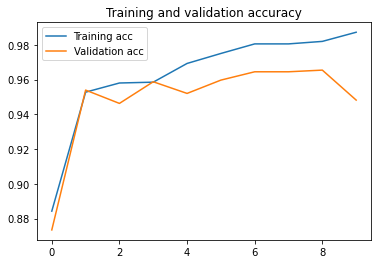

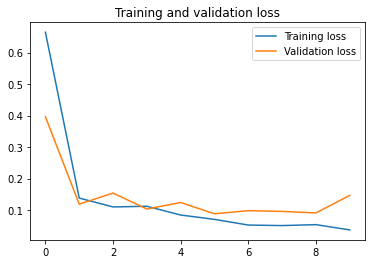

In [7]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [12]:
train_res = model.evaluate(train_ds)

131/131 [==============================] - 29s 225ms/step - loss: 0.0367 - binary_accuracy: 0.9887 - precision: 0.9997 - recall: 0.9852


In [13]:
val_res = model.evaluate(val_ds)

33/33 [==============================] - 7s 216ms/step - loss: 0.1467 - binary_accuracy: 0.9482 - precision: 0.9891 - recall: 0.9406


In [14]:
test_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_ds = train_generator.flow_from_directory(
    test_path,
    target_size=(256,256),
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [15]:
test_res = model.evaluate(test_ds)

20/20 [==============================] - 4s 183ms/step - loss: 0.8345 - binary_accuracy: 0.8093 - precision: 0.7705 - recall: 0.9897


In [16]:
model.save('save_data/01_basic_model/')

INFO:tensorflow:Assets written to: save_data/01_basic_model/assets
